Here is the notebook for Group 7 Final Project:

A Multi-Dataset Approach to Assessing Mental Health Risks in the Workplace:
Clustering and Classification of Key Predictive Factors


# Data Loading and Preprocessing

###Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

###Dataset 1

In [ ]:
# Downloading dataset 1
mh_dataset_1_path = kagglehub.dataset_download("bhadramohit/mental-health-dataset")
df1 = pd.read_csv(mh_dataset_1_path + "/mental_health_dataset.csv")

In [ ]:
# print(df1.dtypes)

# ok here we have 50% missing values for mental health condition severity
# categories: low, medium, high, none

# since this severity label is what we are trying to classify on + predict
# we can split the existing data into train-verify-test sections
# are we getting rid of the none category?
# print(df1.isnull().sum()/len(df1))


df1 = df1.replace({
    "Low":1,
    "Medium":2,
    "High":3,
    "Yes":1,
    "No":0,
})

# print(df1.describe())

# save these values before normalizing for use later
phys_act_hours_toCat = df1['Physical_Activity_Hours'].copy()
sleep_hours_toCat = df1['Sleep_Hours'].copy()

num_cols = [
    "Age",
    "Sleep_Hours",
    "Physical_Activity_Hours",
    "Work_Hours"
    ]
df1[num_cols] = (df1[num_cols] - df1[num_cols].mean()) / df1[num_cols].std()

<ipython-input-43-833e796099a7>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df1.replace({


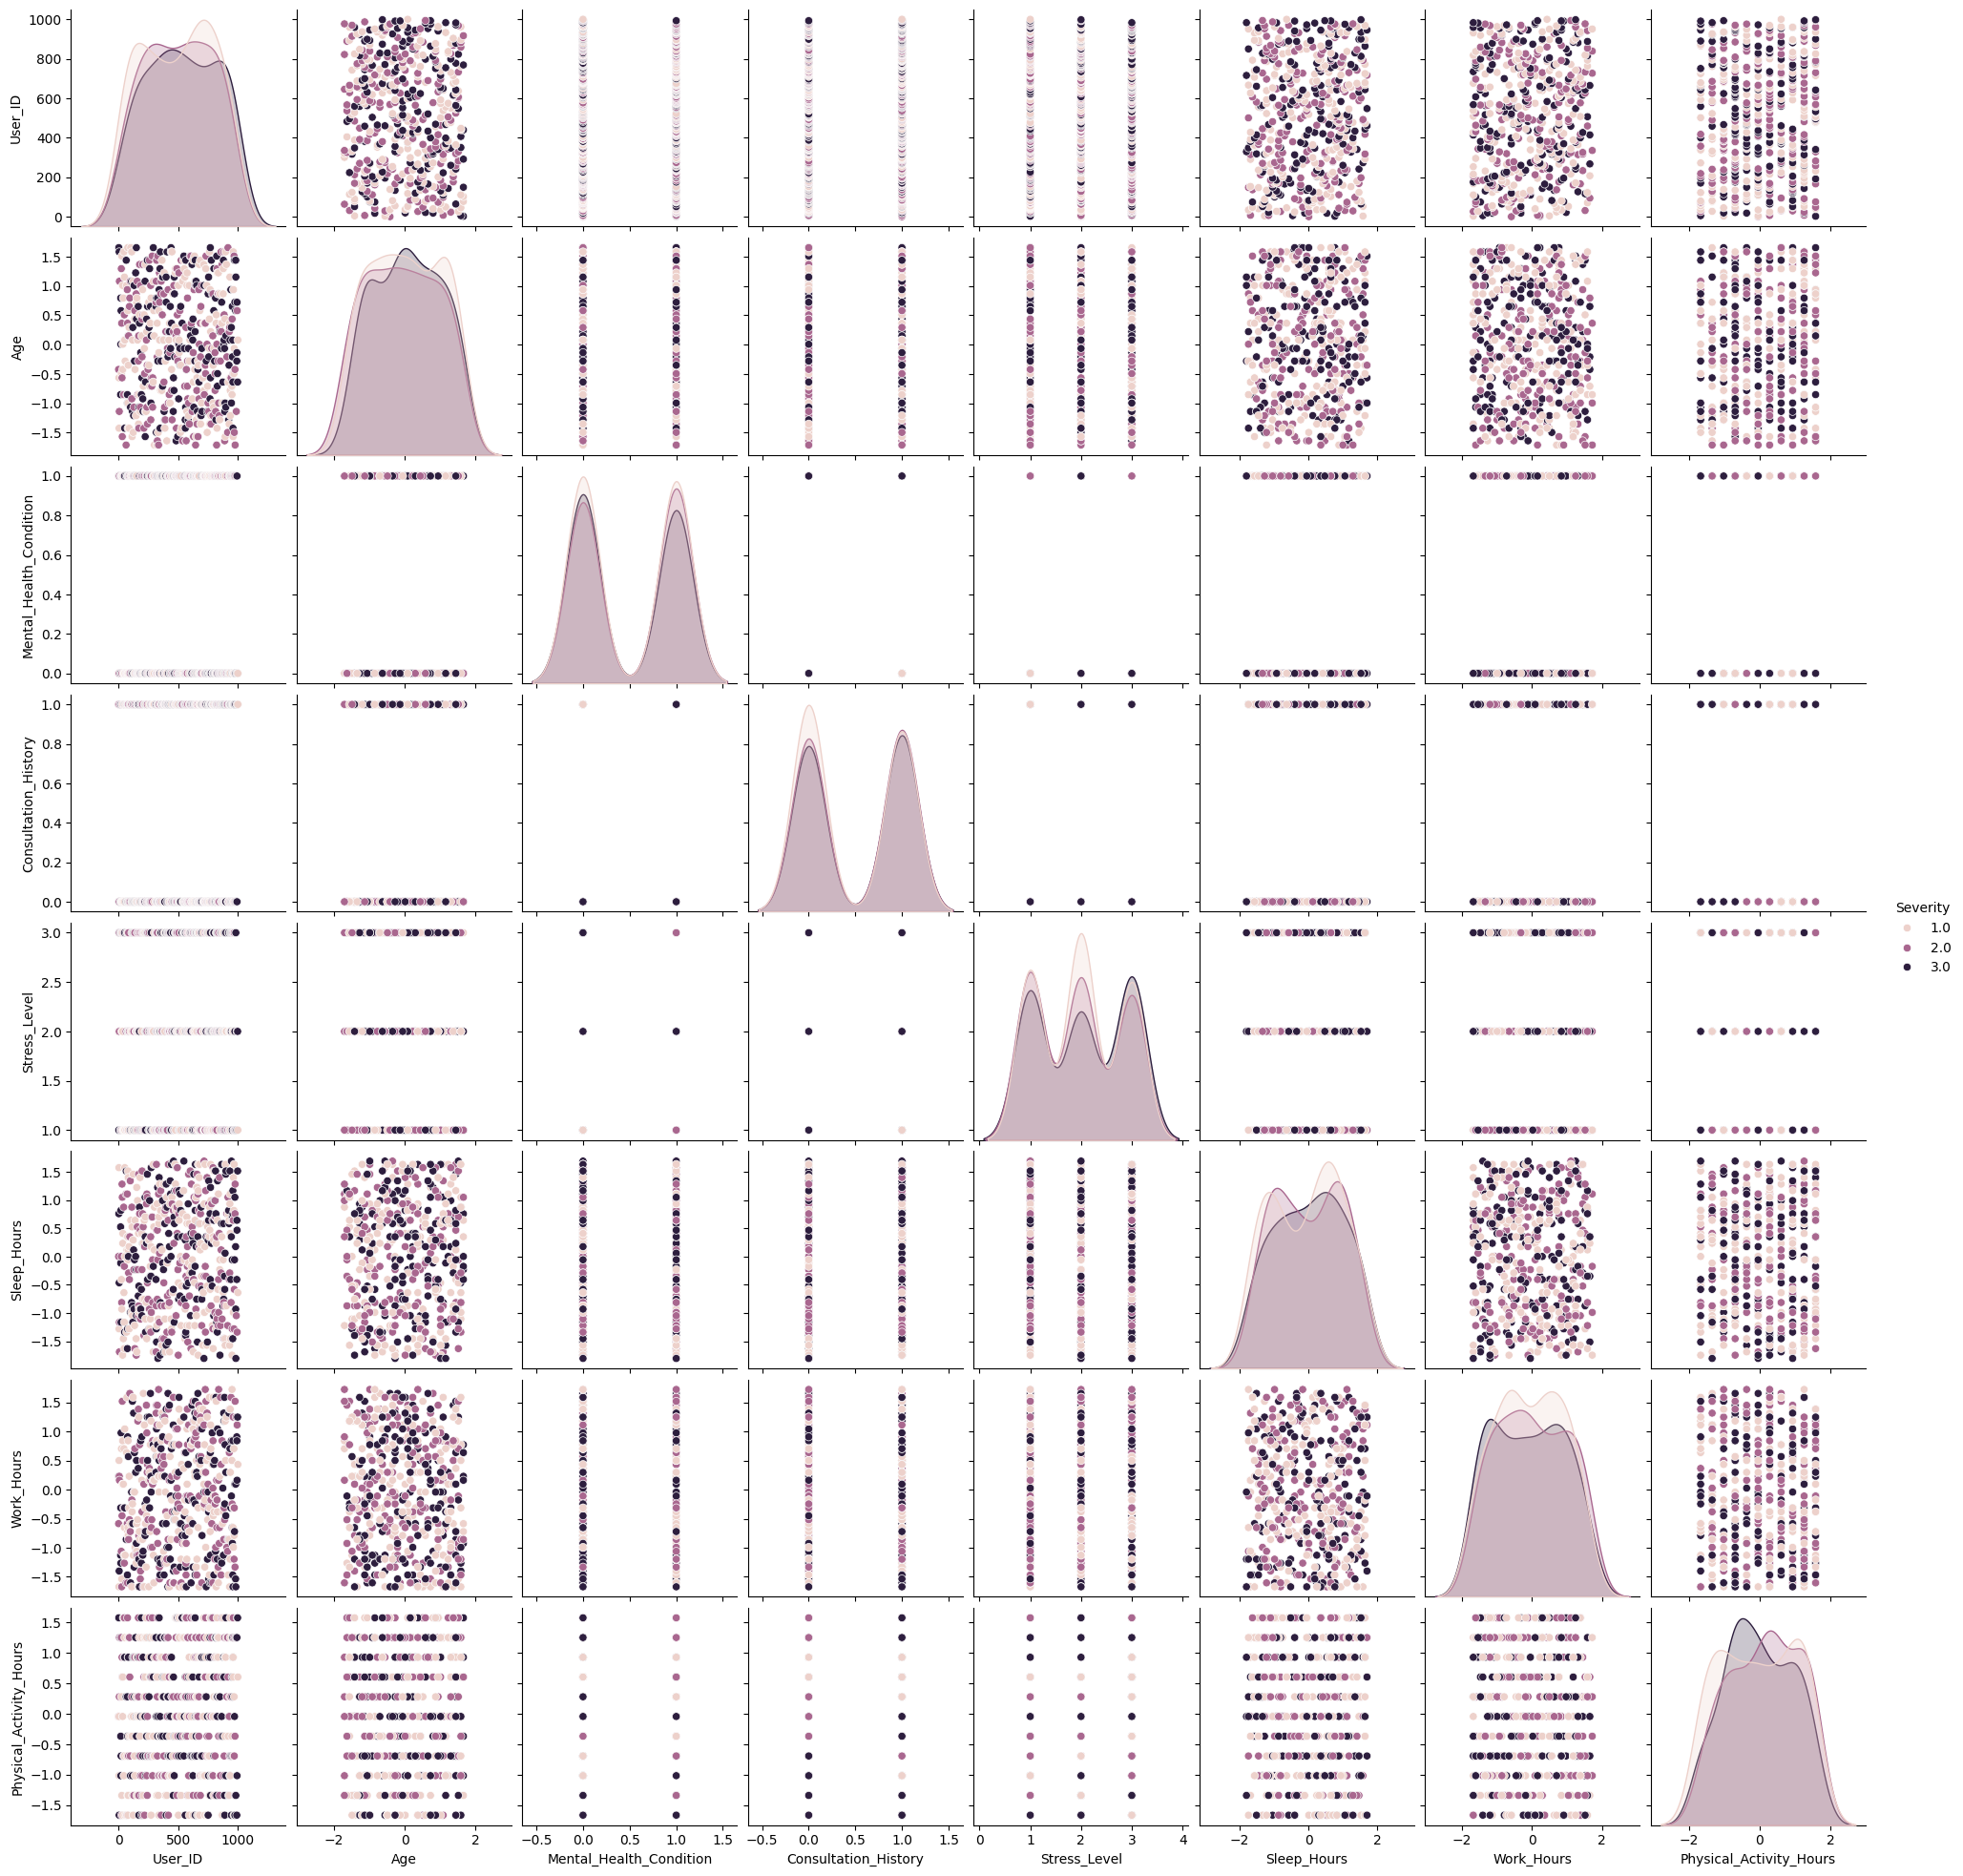

In [ ]:
sns.pairplot(df1, hue='Severity')
plt.show()

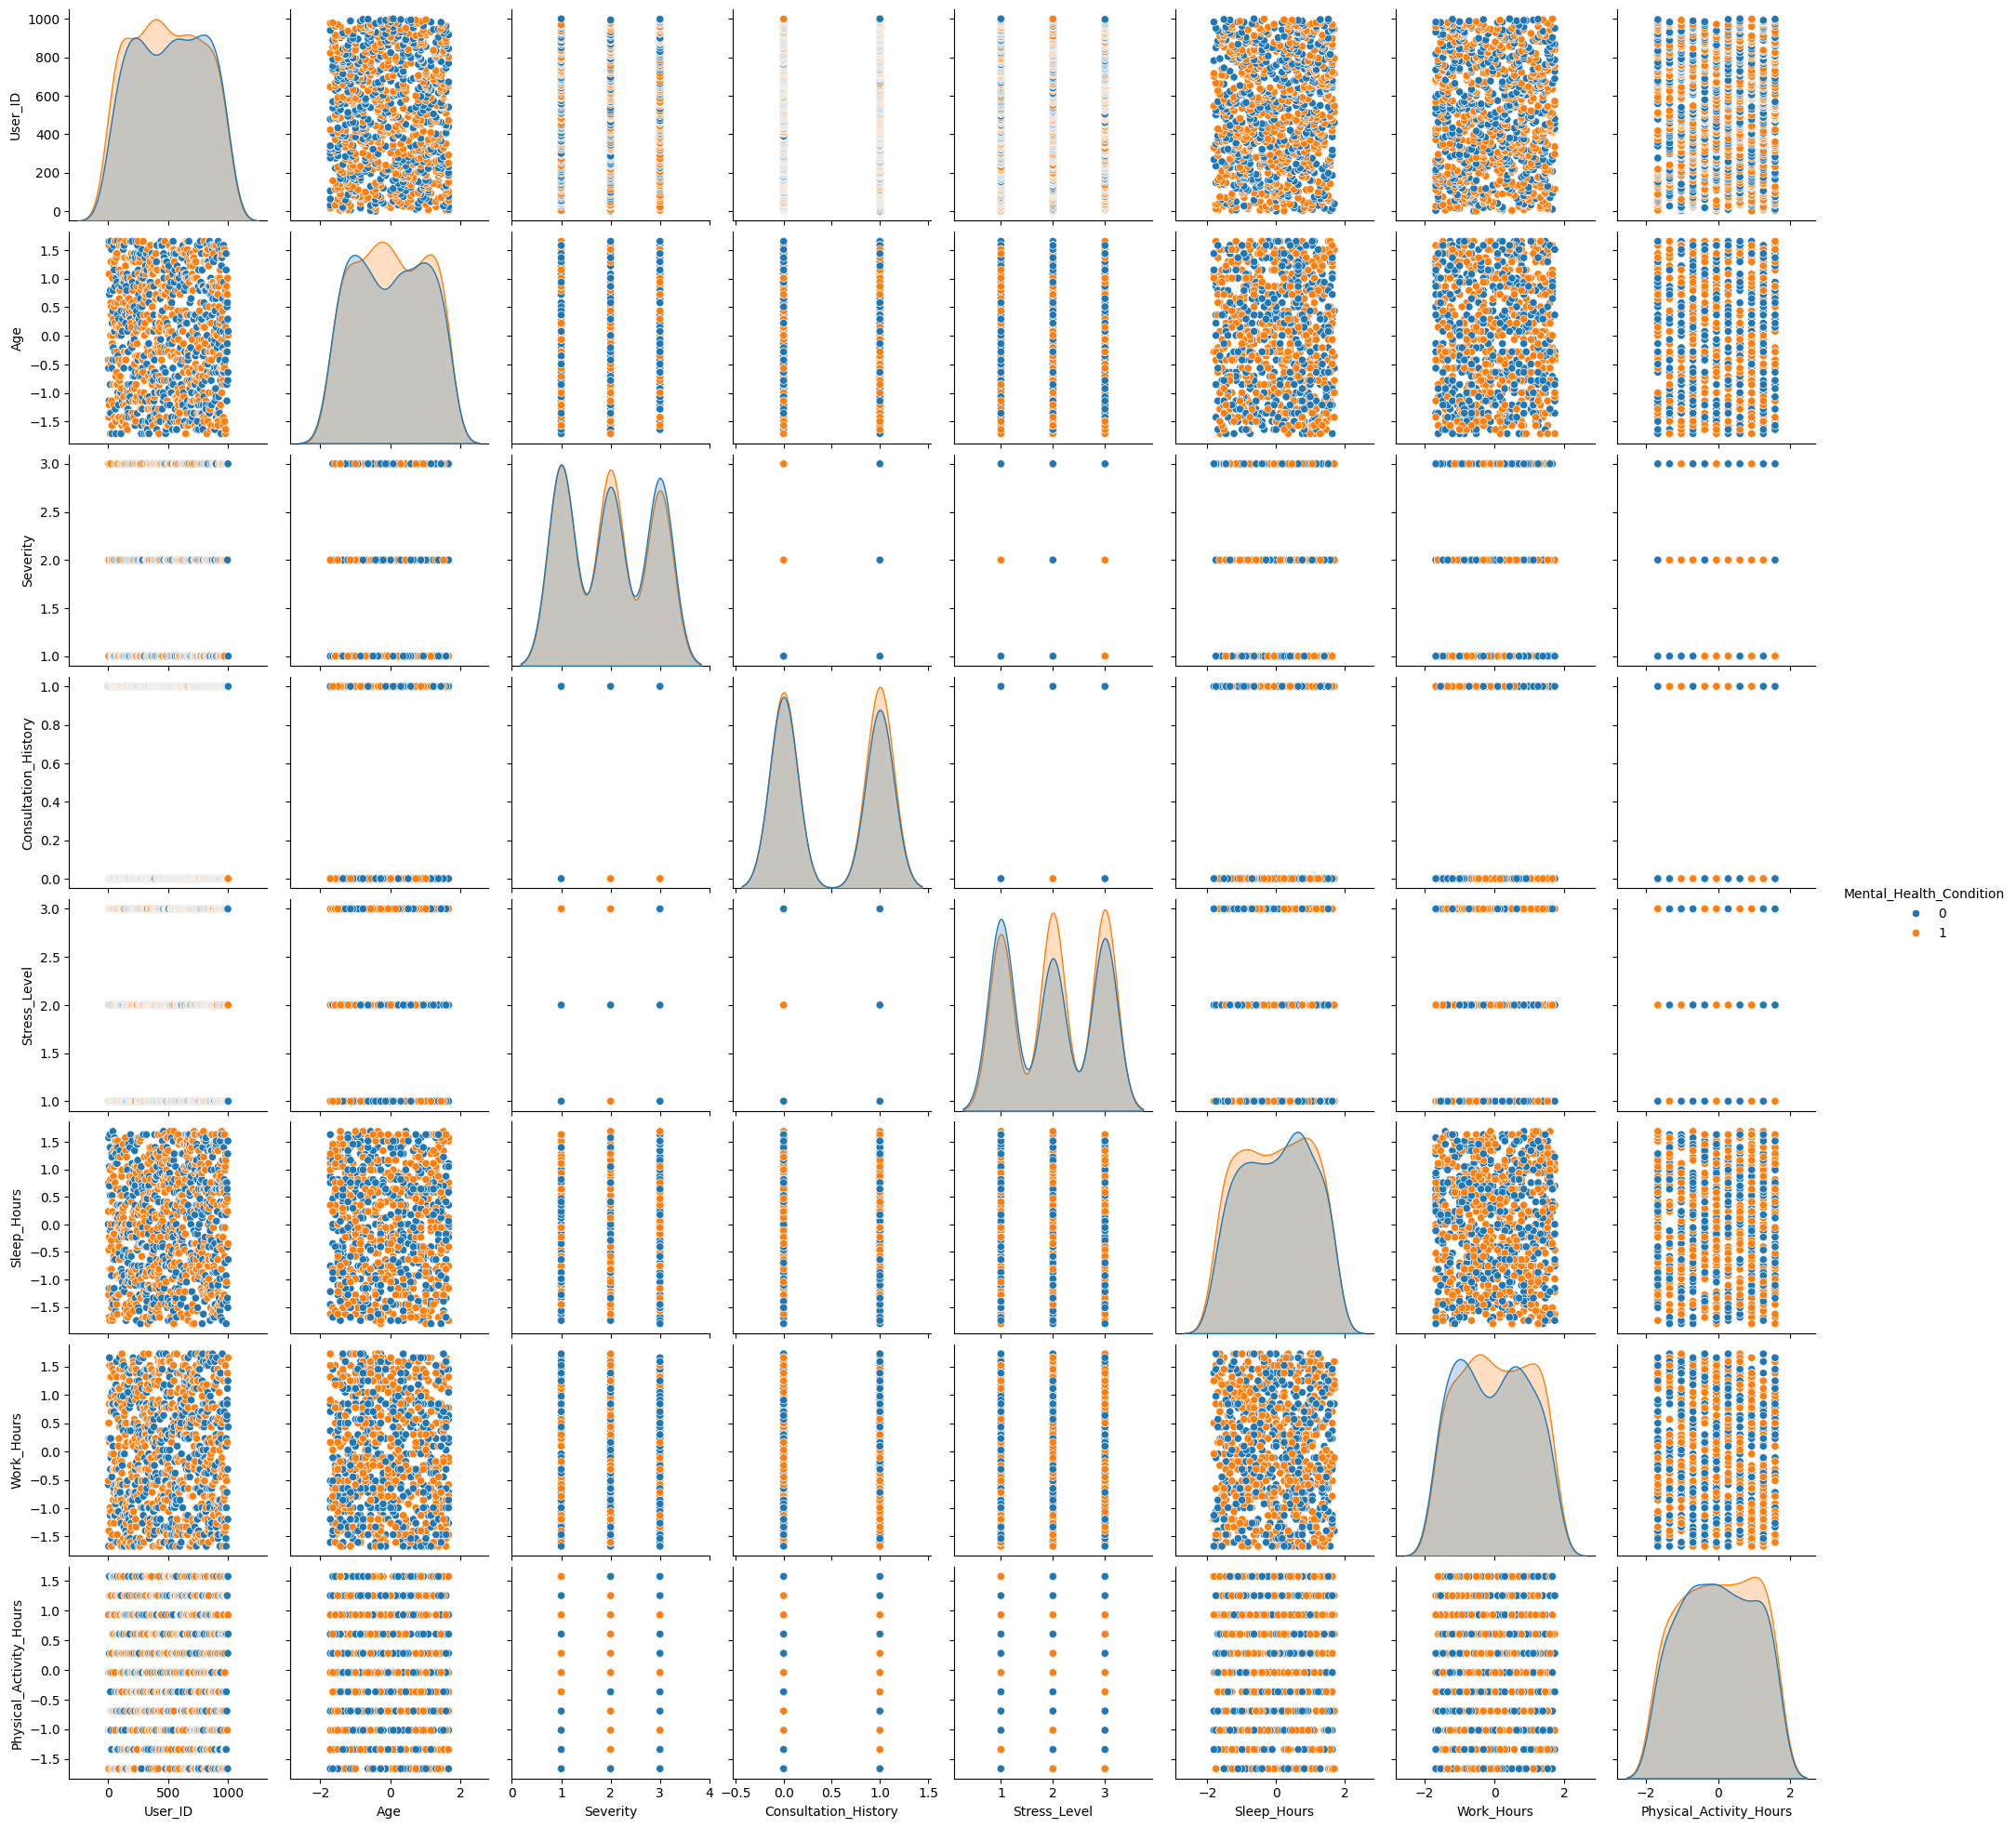

In [ ]:
sns.pairplot(df1, hue='Mental_Health_Condition')
plt.show()

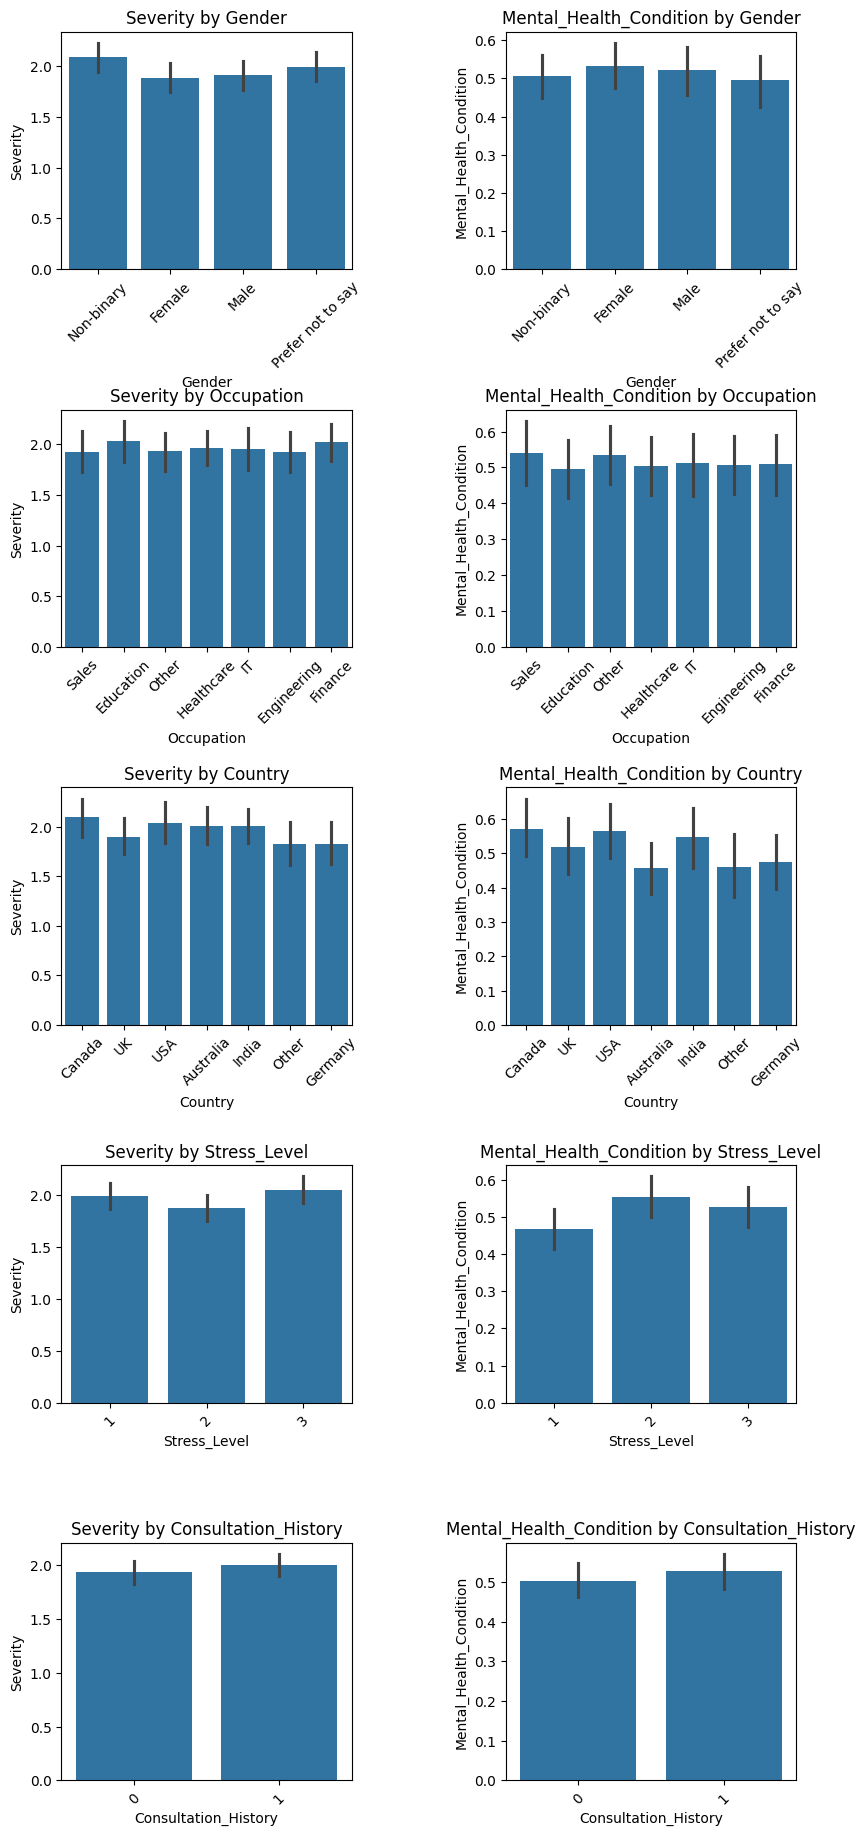

In [ ]:
# Values for x and y
x_values = ["Gender", "Occupation", "Country", "Stress_Level", "Consultation_History"]
y_values = ["Severity", "Mental_Health_Condition"]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))
fig.tight_layout(pad=8.0)

# Plot each combination of x and y
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        ax = axes[i, j]  # Select the appropriate subplot
        sns.barplot(x=x, y=y, data=df1, ax=ax)  # Plot using seaborn
        ax.set_title(f"{y} by {x}")  # Add a title for each plot
        ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels

plt.show()

In [ ]:
df1_dropped = df1.dropna()

df1_dummies = pd.get_dummies(df1_dropped, columns = ["Occupation", "Country", "Gender"], dtype=int)
df1_dummies.head()

User_ID       Age  Mental_Health_Condition  Severity  Consultation_History  \
0        1 -0.421618                        0       2.0                     1   
2        3  1.653554                        1       3.0                     0   
3        4 -0.564733                        0       1.0                     0   
4        5 -1.423424                        1       1.0                     0   
5        6  1.581996                        1       3.0                     0   

   Stress_Level  Sleep_Hours  Work_Hours  Physical_Activity_Hours  \
0             2     0.002567   -0.586102                -0.043481   
2             1     0.761089    0.229723                 1.578943   
3             2     1.577958   -1.673869                -1.016935   
4             2    -1.281084    0.501664                -0.043481   
5             3    -0.464215   -1.401927                -1.665905   

   Occupation_Education  ...  Country_Canada  Country_Germany  Country_India  \
0                     0  ...               1                0              0   
2                     0  ...               0                0              0   
3                     0  ...               0                0              0   
4                     0  ...               1                0              0   
5                     0  ...               0                0              0   

   Country_Other  Country_UK  Country_USA  Gender_Female  Gender_Male  \
0              0           0            0              0            0   
2              0           0            1              0            0   
3              0           0            0              0            1   
4              0           0            0              1            0   
5              0           1            0              0            0   

   Gender_Non-binary  Gender_Prefer not to say  
0                  1                         0  
2                  1                         0  
3                  0                         0  
4                  0                         0  
5                  1                         0  

[5 rows x 27 columns]

In [ ]:
df1_proc = df1.copy()
df1_proc['Region'] = df1_proc['Country'].apply(lambda x: 'Oceania' if x == 'Australia'
                                               else 'North America' if x == 'USA'
                                               else 'North America' if x == 'Canada'
                                               else 'Europe' if x == 'Germany'
                                               else 'Europe' if x == 'UK'
                                               else 'Asia' if x == 'India'
                                               else 'Other')
df1_proc['Physical_Activity'] = phys_act_hours_toCat.apply(lambda x:
                                                           'None' if x == 0
                                                           else 'Low' if x < 6
                                                           else 'High')
# use the IQR for our new categories
df1_proc['Sleep_Quality'] = sleep_hours_toCat.apply(lambda x:
                                                    'Poor' if x < sleep_hours_toCat.quantile(0.25)
                                                    else 'Average' if x < sleep_hours_toCat.quantile(0.75)
                                                    else 'High')

We have found from the pairplots and bar graphs of the various features against Mental Health Condition and Severity that there is no obvious influential feature. Here, we see the need for a more in-depth exploration of the potential influences on mental health risk through classification techniques.

###Dataset 2

In [ ]:
# Downloading dataset 2
mh_tech_path = kagglehub.dataset_download("osmi/mental-health-in-tech-survey")
mh_tech = pd.read_csv(mh_tech_path + "/survey.csv")

In [ ]:
mh_tech_proc = mh_tech.copy()

# this dataset is for tech workers, so we can assign all to IT
mh_tech_proc['Occupation'] = 'IT'

mh_tech_proc['Mental_Health_Condition'] = mh_tech_proc['treatment'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')
mh_tech_proc.drop(['treatment'], axis=1, inplace=True)

continent_mapping = {
    'United States': 'North America',
    'United Kingdom': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Ireland': 'Europe',
    'Netherlands': 'Europe',
    'Australia': 'Oceania',
    'France': 'Europe',
    'India': 'Asia',
    'New Zealand': 'Oceania',
    'Poland': 'Europe',
    'Switzerland': 'Europe',
    'Sweden': 'Europe',
    'Italy': 'Europe',
    'South Africa': 'Africa',
    'Belgium': 'Europe',
    'Brazil': 'South America',
    'Israel': 'Asia',
    'Singapore': 'Asia',
    'Bulgaria': 'Europe',
    'Austria': 'Europe',
    'Finland': 'Europe',
    'Mexico': 'North America',
    'Russia': 'Europe',  # Or Asia
    'Denmark': 'Europe',
    'Greece': 'Europe',
    'Colombia': 'South America',
    'Croatia': 'Europe',
    'Portugal': 'Europe',
    'Moldova': 'Europe',
    'Georgia': 'Europe',  # Or Asia
    'Bahamas, The': 'North America',
    'China': 'Asia',
    'Thailand': 'Asia',
    'Czech Republic': 'Europe',
    'Norway': 'Europe',
    'Romania': 'Europe',
    'Nigeria': 'Africa',
    'Japan': 'Asia',
    'Hungary': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Uruguay': 'South America',
    'Spain': 'Europe',
    'Zimbabwe': 'Africa',
    'Latvia': 'Europe',
    'Costa Rica': 'North America',
    'Slovenia': 'Europe',
    'Philippines': 'Asia'
}
mh_tech_proc['Region'] = mh_tech_proc['Country'].map(continent_mapping)

# we decide that "Never" and "Rarely" match closest with "Low" on the stress level
# and NaN will be assigned "Low" as well
mh_tech_proc['Stress_Level'] = mh_tech_proc['work_interfere'].apply(lambda x:
                                                                    'High' if x == 'Often'
                                                                    else 'Medium' if x == 'Sometimes'
                                                                    else 'Low')

def map_gender(gender):
    if gender.lower() in ['male', 'm', 'make', 'cis male', 'man', 'mail', 'malr', 'cis man', 'guy (-ish) ^_^', 'male-ish', 'maile', 'mal', 'male (cis)', 'ostensibly male, unsure what that really means']:
        return 'Male'
    elif gender.lower() in ['female', 'f', 'woman', 'cis female', 'female (trans)', 'female (cis)', 'cis-female/femme', 'femail', 'trans-female', 'femake', 'woman']:
        return 'Female'
    elif gender.lower() in ['enby', 'agender', 'androgyne', 'queer/she/they', 'non-binary', 'genderqueer', 'trans woman', 'queer', 'neuter',  'male leaning androgynous', 'fluid']:
        return 'Non-binary'
    else:
        return 'Prefer not to say'

mh_tech_proc['Gender'] = mh_tech_proc['Gender'].apply(map_gender)

mh_tech_proc['Access_to_Mental_Health_Resources'] = mh_tech_proc['benefits'].apply(lambda x:
                                                                                   'Yes' if x == 'Yes'
                                                                                   else 'No')

###Dataset 3

In [ ]:
# Downloading dataset 3
mh_remote_path = kagglehub.dataset_download("waqi786/remote-work-and-mental-health")
mh_remote = pd.read_csv(mh_remote_path + "/Impact_of_Remote_Work_on_Mental_Health.csv")

In [ ]:
mh_remote_proc = mh_remote.copy()
mh_remote_proc['Occupation'] = mh_remote_proc['Industry']
mh_remote_proc.drop(['Industry'], axis=1, inplace=True)

# here, the mental health condition variable specifies a type
# which is mismatched from the other datasets
# let's save this in another column and then create the accurate
# 'Mental_Health_Condition' column with 'Yes' for any reported condition
mh_remote_proc['Condition_Type'] = mh_remote_proc['Mental_Health_Condition']
mh_remote_proc['Mental_Health_Condition'] = mh_remote_proc['Mental_Health_Condition'].apply(lambda x:
                                                                                            'Yes' if x == 'Burnout'
                                                                                            or x == 'Anxiety'
                                                                                            or x == 'Depression'
                                                                                            else 'No')

mh_remote_proc['Work_Hours'] = mh_remote_proc['Hours_Worked_Per_Week']
mh_remote_proc.drop(['Hours_Worked_Per_Week'], axis=1, inplace=True)

mh_remote_proc['Physical_Activity_Cat'] = mh_remote_proc['Physical_Activity']
mh_remote_proc['Physical_Activity'] = mh_remote_proc['Physical_Activity'].apply(lambda x:
                                                                                      'Low' if x =='Weekly'
                                                                                      else 'High' if x =='Daily'
                                                                                      else 'None')
mh_remote_proc['remote_work'] = mh_remote_proc['Work_Location'].apply(lambda x:
                                                                      'No' if x == 'Onsite'
                                                                      else 'Yes')

At this point we have three processed datasets with the following features in common:

Between all three (df1_proc, mh_tech_proc, and mh_remote_proc):
* 'Region' - the continent of the respondent
* 'Mental_Health_Condition' - 'Yes' if a condition is reported, 'No' otherwise
* 'Stress_Level' - Possible values: 'Low', 'Medium', 'High'
* 'Gender' - Possible values: 'Male', 'Female', 'Non-binary', 'Prefer not to answer'

Between df1_proc and mh_remote_proc:
* 'Work_Hours' - reported hours worked per week
* 'Physical_Activity' - Possible values: 'None', 'Low', 'High'
* 'Sleep_Quality' - Possible values: 'Poor', 'Average', 'Good'

Between mh_tech_proc and mh_remote_proc:
* 'remote_work' - 'Yes' if some remote work is reported, 'No' if not
* 'Access_to_Mental_Health_Resources' - 'Yes' if employee is aware of employer provided mental health resources, 'No' otherwise

###Combination

In [ ]:
# Align columns

# mh_tech_proc['Physical_Activity'] = 'Unknown'
# df3['Sleep_Quality'] = 'Unknown'
# mh_tech_proc['Work_Hours'] = 'Unknown'

# Combine datasets
combined_data = pd.concat([df1_proc, mh_tech_proc, mh_remote_proc], axis=0, ignore_index=True)

# Fill missing values
#combined_data.fillna(null, inplace=True)

In [ ]:
combined_data.head().T

0          1              2  \
User_ID                                      1.0        2.0            3.0   
Age                                    -0.421618  -0.564733       1.653554   
Gender                                Non-binary     Female     Non-binary   
Occupation                                 Sales  Education          Sales   
Country                                   Canada         UK            USA   
Mental_Health_Condition                        0          1              1   
Severity                                     2.0        NaN            3.0   
Consultation_History                         1.0        0.0            0.0   
Stress_Level                                   2          1              1   
Sleep_Hours                             0.002567   0.235959       0.761089   
Work_Hours                             -0.586102  -0.518117       0.229723   
Physical_Activity_Hours                -0.043481   0.929974       1.578943   
Region                             North America     Europe  North America   
Physical_Activity                            Low       High           High   
Sleep_Quality                            Average    Average        Average   
Timestamp                                    NaN        NaN            NaN   
state                                        NaN        NaN            NaN   
self_employed                                NaN        NaN            NaN   
family_history                               NaN        NaN            NaN   
work_interfere                               NaN        NaN            NaN   
no_employees                                 NaN        NaN            NaN   
remote_work                                  NaN        NaN            NaN   
tech_company                                 NaN        NaN            NaN   
benefits                                     NaN        NaN            NaN   
care_options                                 NaN        NaN            NaN   
wellness_program                             NaN        NaN            NaN   
seek_help                                    NaN        NaN            NaN   
anonymity                                    NaN        NaN            NaN   
leave                                        NaN        NaN            NaN   
mental_health_consequence                    NaN        NaN            NaN   
phys_health_consequence                      NaN        NaN            NaN   
coworkers                                    NaN        NaN            NaN   
supervisor                                   NaN        NaN            NaN   
mental_health_interview                      NaN        NaN            NaN   
phys_health_interview                        NaN        NaN            NaN   
mental_vs_physical                           NaN        NaN            NaN   
obs_consequence                              NaN        NaN            NaN   
comments                                     NaN        NaN            NaN   
Access_to_Mental_Health_Resources            NaN        NaN            NaN   
Employee_ID                                  NaN        NaN            NaN   
Job_Role                                     NaN        NaN            NaN   
Years_of_Experience                          NaN        NaN            NaN   
Work_Location                                NaN        NaN            NaN   
Number_of_Virtual_Meetings                   NaN        NaN            NaN   
Work_Life_Balance_Rating                     NaN        NaN            NaN   
Productivity_Change                          NaN        NaN            NaN   
Social_Isolation_Rating                      NaN        NaN            NaN   
Satisfaction_with_Remote_Work                NaN        NaN            NaN   
Company_Support_for_Remote_Work              NaN        NaN            NaN   
Condition_Type                               NaN        NaN            NaN   
Physical_Activity_Cat                        NaN        NaN          

In [ ]:
combined_data = combined_data.drop(['User_ID', 'Timestamp', 'comments', 'Employee_ID', 'state'], axis=1)

In [ ]:
#combined_data.isnull().sum()/len(combined_data)

In [ ]:
len(combined_data.columns)

46

In [ ]:
combined_data_concise = combined_data.dropna(thresh=combined_data.shape[0]*0.5,axis=1)

In [ ]:
len(combined_data_concise.columns)

21

In [ ]:
#combined_data_concise.isnull().sum()/len(combined_data)

In [ ]:
combined_data_concise.head().T

0          1              2  \
Age                                    -0.421618  -0.564733       1.653554   
Gender                                Non-binary     Female     Non-binary   
Occupation                                 Sales  Education          Sales   
Mental_Health_Condition                        0          1              1   
Stress_Level                                   2          1              1   
Work_Hours                             -0.586102  -0.518117       0.229723   
Region                             North America     Europe  North America   
Physical_Activity                            Low       High           High   
Sleep_Quality                            Average    Average        Average   
remote_work                                  NaN        NaN            NaN   
Access_to_Mental_Health_Resources            NaN        NaN            NaN   
Job_Role                                     NaN        NaN            NaN   
Years_of_Experience                          NaN        NaN            NaN   
Work_Location                                NaN        NaN            NaN   
Number_of_Virtual_Meetings                   NaN        NaN            NaN   
Work_Life_Balance_Rating                     NaN        NaN            NaN   
Productivity_Change                          NaN        NaN            NaN   
Social_Isolation_Rating                      NaN        NaN            NaN   
Satisfaction_with_Remote_Work                NaN        NaN            NaN   
Company_Support_for_Remote_Work              NaN        NaN            NaN   
Condition_Type                               NaN        NaN            NaN   

                                          3              4  
Age                               -0.564733      -1.423424  
Gender                                 Male         Female  
Occupation                            Other     Healthcare  
Mental_Health_Condition                   0              1  
Stress_Level                              2              2  
Work_Hours                        -1.673869       0.501664  
Region                              Oceania  North America  
Physical_Activity                       Low            Low  
Sleep_Quality                          High           Poor  
remote_work                             NaN            NaN  
Access_to_Mental_Health_Resources       NaN            NaN  
Job_Role                                NaN            NaN  
Years_of_Experience                     NaN            NaN  
Work_Location                           NaN            NaN  
Number_of_Virtual_Meetings              NaN            NaN  
Work_Life_Balance_Rating                NaN            NaN  
Productivity_Change                     NaN            NaN  
Social_Isolation_Rating                 NaN            NaN  
Satisfaction_with_Remote_Work           NaN            NaN  
Company_Support_for_Remote_Work         NaN            NaN  
Condition_Type                          NaN            NaN

In [ ]:
combined_data_concise.isnull().sum()/len(combined_data_concise)

Age                                  0.000000
Gender                               0.000000
Occupation                           0.000000
Mental_Health_Condition              0.000000
Stress_Level                         0.000000
Work_Hours                           0.173440
Region                               0.000000
Physical_Activity                    0.173440
Sleep_Quality                        0.173440
remote_work                          0.137760
Access_to_Mental_Health_Resources    0.137760
Job_Role                             0.311200
Years_of_Experience                  0.311200
Work_Location                        0.311200
Number_of_Virtual_Meetings           0.311200
Work_Life_Balance_Rating             0.311200
Productivity_Change                  0.311200
Social_Isolation_Rating              0.311200
Satisfaction_with_Remote_Work        0.311200
Company_Support_for_Remote_Work      0.311200
Condition_Type                       0.475961
dtype: float64

In [ ]:
#combined_data_concise.dtypes

In [ ]:
combined_data_concise['Physical_Activity'].value_counts()

Physical_Activity
Low     2211
High    2081
None    1708
Name: count, dtype: int64

In [ ]:
combined_data_concise['Physical_Activity'] = combined_data_concise['Physical_Activity'].fillna(combined_data_concise['Physical_Activity'].mode())
combined_data_concise['Physical_Activity'].isnull().sum()

<ipython-input-65-cc5961f76fb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_concise['Physical_Activity'] = combined_data_concise['Physical_Activity'].fillna(combined_data_concise['Physical_Activity'].mode())


1259

In [ ]:
# converting certain categorical features to numerical:
# all except Gender, Occupation, Region, Job_Role, Work_Location, Condition_Type

combined_data_concise['Mental_Health_Condition'] = combined_data_concise['Mental_Health_Condition'].apply(lambda x:
                                                                                      1 if x =='Yes'
                                                                                      else 0)

combined_data_concise['Stress_Level'] = combined_data_concise['Stress_Level'].apply(lambda x:
                                                                                      1 if x =='Low'
                                                                                      else 2 if x =='Medium'
                                                                                      else 3)

combined_data_concise['Physical_Activity'] = combined_data_concise['Physical_Activity'].apply(lambda x:
                                                                                      1 if x =='Low'
                                                                                      else 2 if x =='High'
                                                                                      else 0)

combined_data_concise['Sleep_Quality'] = combined_data_concise['Sleep_Quality'].apply(lambda x:
                                                                                      0 if x =='Average'
                                                                                      else 1 if x =='Good'
                                                                                      else -1 if x=='Poor'
                                                                                      else 2)

combined_data_concise['remote_work'] = combined_data_concise['remote_work'].apply(lambda x:
                                                                                      0 if x =='No'
                                                                                      else 1)

combined_data_concise['Access_to_Mental_Health_Resources'] = combined_data_concise['Access_to_Mental_Health_Resources'].apply(lambda x:
                                                                                      0 if x =='No'
                                                                                      else 1)

combined_data_concise['Productivity_Change'] = combined_data_concise['Productivity_Change'].apply(lambda x:
                                                                                      0 if x =='No Change'
                                                                                      else 1 if x =='Increase'
                                                                                      else -1)

combined_data_concise['Satisfaction_with_Remote_Work'] = combined_data_concise['Satisfaction_with_Remote_Work'].apply(lambda x:
                                                                                      0 if x =='Neutral'
                                                                                      else 1 if x =='Satisfied'
                                                                                      else -1)

<ipython-input-66-8f597f69ea8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_concise['Mental_Health_Condition'] = combined_data_concise['Mental_Health_Condition'].apply(lambda x:
<ipython-input-66-8f597f69ea8d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_concise['Stress_Level'] = combined_data_concise['Stress_Level'].apply(lambda x:
<ipython-input-66-8f597f69ea8d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

# Pseudo Label Model

## Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
def prepare_dataset(data_df):
    data_df = data_df.copy()
    cat_cols = data_df.select_dtypes('object').columns
    num_cols = data_df.columns.drop(cat_cols)
    for col in cat_cols:
        encoder = LabelEncoder()
        data_df[col] = encoder.fit_transform(data_df[col])
    return data_df, cat_cols, num_cols

In [ ]:
combined_data_encoded, cat_cols, num_cols = prepare_dataset(combined_data_concise)
combined_data_encoded = combined_data_encoded.fillna(0)
combined_data_encoded.isna().sum()

Age                                  0
Gender                               0
Occupation                           0
Mental_Health_Condition              0
Stress_Level                         0
Work_Hours                           0
Region                               0
Physical_Activity                    0
Sleep_Quality                        0
remote_work                          0
Access_to_Mental_Health_Resources    0
Job_Role                             0
Years_of_Experience                  0
Work_Location                        0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Condition_Type                       0
dtype: int64

## Tabular Embedding
- **Skip to Import Embedding Data section for fetching the embedding dataset.**

In [ ]:
!pip install arize
!pip install 'arize[AutoEmbeddings]'

In [ ]:
from arize.pandas.embeddings import EmbeddingGenerator, UseCases

# Instantiate the embeddding generator
generator = EmbeddingGenerator.from_use_case(
    use_case=UseCases.STRUCTURED.TABULAR_EMBEDDINGS,
    model_name="distilbert-base-uncased",
    tokenizer_max_length=30,
    batch_size=100
)

# Select the columns from your dataframe to consider
selected_cols = combined_data_encoded.columns.to_list()

combined_data_encoded["tabular_embedding_vector"] = generator.generate_embeddings(
    combined_data_encoded,
    selected_columns=selected_cols,
)


  arize.utils.logging | WARNING | No available GPU has been detected. The use of GPU acceleration is strongly recommended. You can check for GPU availability by running `torch.cuda.is_available()` or `torch.backends.mps.is_available()`.
  arize.utils.logging | INFO | Downloading pre-trained model 'distilbert-base-uncased'


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

  arize.utils.logging | INFO | Downloading tokenizer for 'distilbert-base-uncased'


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

  arize.utils.logging | INFO | Generating embedding vectors


Map:   0%|          | 0/7259 [00:00<?, ? examples/s]

In [ ]:
df = combined_data_encoded["tabular_embedding_vector"]

In [ ]:
values_expanded = pd.DataFrame(df.tolist())

In [ ]:
pd.DataFrame(values_expanded).to_csv('final_data_embedding.csv', index=False)

## Import Embedding Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! gdown 1JWXgRps9XQKq19HobV_m9lktcrhQZoWT

Downloading...
From (original): https://drive.google.com/uc?id=1JWXgRps9XQKq19HobV_m9lktcrhQZoWT
From (redirected): https://drive.google.com/uc?id=1JWXgRps9XQKq19HobV_m9lktcrhQZoWT&confirm=t&uuid=84e9b082-2a50-477c-8291-7ab17ede68f7
To: /content/final_data_embedding.csv
100% 113M/113M [00:00<00:00, 153MB/s]


## PCA

In [ ]:
combined_data_embedding = pd.read_csv("final_data_embedding.csv")

In [ ]:
from sklearn.decomposition import PCA
embedding_np = np.array(combined_data_embedding.to_numpy())
pca = PCA(n_components=50)
pca.fit(combined_data_embedding)

PCA(n_components=50)

In [ ]:
curr = 0
for i, var in enumerate(pca.explained_variance_ratio_):
  curr+=var
  if curr >= 0.9:
    print(i+1)
    break

6


In [ ]:
pca = PCA(n_components=6)
pca_embedding = pca.fit_transform(combined_data_embedding)

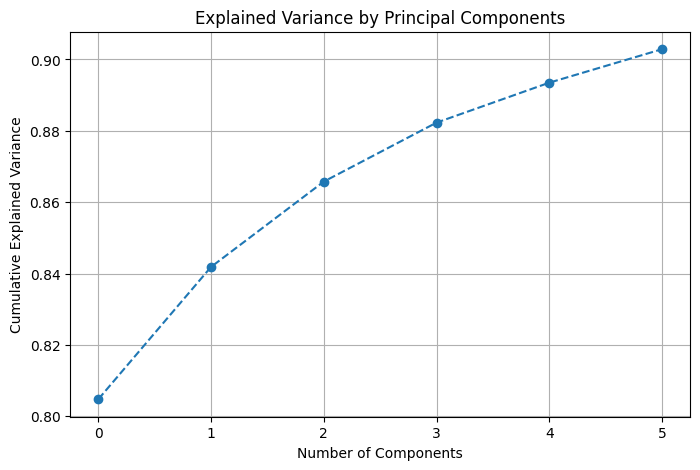

In [ ]:
# any relevant code
combined_data_embedding_pca = combined_data_embedding.copy()
combined_data_embedding_pca['PC0'] = pca_embedding[:, 0]
combined_data_embedding_pca['PC1'] = pca_embedding[:, 1]
combined_data_embedding_pca['PC2'] = pca_embedding[:, 2]
combined_data_embedding_pca['PC3'] = pca_embedding[:, 3]
combined_data_embedding_pca['PC4'] = pca_embedding[:, 4]
combined_data_embedding_pca['PC5'] = pca_embedding[:, 5]
plt.figure(figsize=(8, 5))
plt.plot(np.arange(0, len(pca.explained_variance_ratio_)),
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(0, len(pca.explained_variance_ratio_)))
plt.grid(True)
plt.show()

In [ ]:
pca_embedding

array([[-3.66372522, -0.08565084,  0.06815347,  0.07860498,  0.45450167,
         0.13110757],
       [-3.46508753, -0.38321171, -0.01988425, -0.06953423, -0.45099978,
        -0.23754298],
       [-3.48110466,  0.11787795, -0.43198333,  0.0168247 , -0.14682087,
        -0.08253757],
       ...,
       [ 0.5324998 ,  0.27081974, -0.1216339 ,  0.08439342, -0.16664823,
         0.28175463],
       [ 0.51939135, -0.20907639,  0.05916523, -0.2225189 ,  0.10410983,
         0.14785141],
       [ 0.45447417,  0.19728539,  0.10481348, -0.11408029,  0.05786528,
        -0.12392746]])

## KMean Pseudo Labeling

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmean = KMeans(n_clusters=3, random_state=42)
kmean.fit(pca_embedding)
y = kmean.labels_
y+=1

embed = pd.DataFrame(pca_embedding)
embed["Severity"] = y

In [ ]:
silhouette_avg = silhouette_score(pca_embedding, y)
print(silhouette_avg)

0.7610090010787953


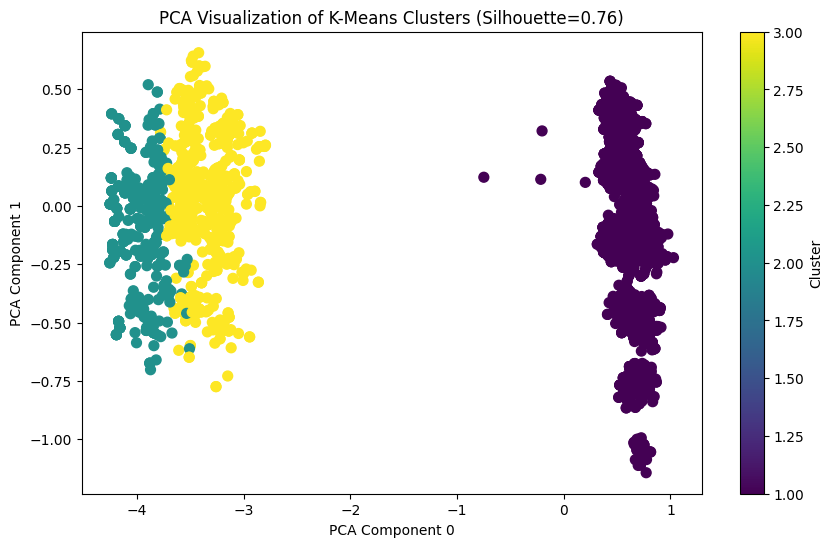

In [ ]:
# Plot the results with cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=y, cmap='viridis', s=50)
plt.title(f"PCA Visualization of K-Means Clusters (Silhouette={silhouette_avg:.2f})")
plt.xlabel("PCA Component 0")
plt.ylabel("PCA Component 1")
plt.colorbar(label='Cluster')
plt.show()

# Classification Model

## Artificial Neural Network

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
y = "Severity"
X = embed.columns.drop(y)

In [ ]:
!pip install -q -U keras-tuner

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 11, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners import open_spinner
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/spinners.py", line 9, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/util

In [ ]:
! pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import keras_tuner as kt
from sklearn.model_selection import train_test_split

# Create train test split
X_data = embed[X]
y_data = pd.get_dummies(embed[y], dtype = int)
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
# Define initial model for hyper parameter search
input_shape = X_train.shape[1]

def build_model(hp):
    hp_units_1 = hp.Int('units_1', min_value=32, max_value=128, step=32)
    hp_units_2 = hp.Int('units_2', min_value=32, max_value=128, step=32)
    hp_dropout_1 = hp.Float("dropout_1", min_value=0, max_value=0.8, step=0.1)
    hp_dropout_2 = hp.Float("dropout_2", min_value=0, max_value=0.8, step=0.1)
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(input_shape,)),
      tf.keras.layers.Dense(hp_units_1, activation='relu'),
      tf.keras.layers.Dropout(hp_dropout_1),
      tf.keras.layers.Dense(hp_units_2, activation='relu'),
      tf.keras.layers.Dropout(hp_dropout_2),
      tf.keras.layers.Dense(3, activation='softmax'),
    ])

    hp_learning_rate = hp.Choice('learning_rate', values=[0.01, 0.005, 0.001, 0.0005, 0.0001])
    model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
      loss=tf.keras.losses.categorical_crossentropy,
      metrics=['accuracy']
    )

    return model

In [ ]:
# Hyperprameter Search
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=5,
                     factor=3,
                     directory='my_dir',
                     project_name='trial_6')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
tuner.search(X_train, y_train, epochs=100, validation_split=0.1, callbacks = [stop_early])

Trial 10 Complete [00h 00m 07s]
val_accuracy: 0.9724612832069397

Best val_accuracy So Far: 0.9931153059005737
Total elapsed time: 00h 00m 49s


In [ ]:
best_hps=tuner.get_best_hyperparameters()[0]
print(f"""
The hyperparameter search is complete. The optimal number of neurons are
{best_hps.get('units_1')},
{best_hps.get('units_2')}, and drop rate of
{best_hps.get('dropout_1')},
{best_hps.get('dropout_2')}, the optimal learning rate for the optimizer
is
{best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of neurons are
32,
96, and drop rate of
0.7000000000000001,
0.4, the optimal learning rate for the optimizer
is
0.01.



In [ ]:
input_shape = X_train.shape[1]
def build_finetuned_model(unit_1,
                          unit_2,
                          dropout_1,
                          dropout_2,
                          lr):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(unit_1, activation='relu', input_shape = (input_shape,)),
    tf.keras.layers.Dropout(dropout_1),
    tf.keras.layers.Dense(unit_2, activation='relu'),
    tf.keras.layers.Dropout(dropout_2),
    tf.keras.layers.Dense(3, activation='softmax'),
  ])

  model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['auc']
  )

  return model

In [ ]:
model = build_finetuned_model(
    best_hps.get('units_1'),
    best_hps.get('units_2'),
    best_hps.get('dropout_1'),
    best_hps.get('dropout_2'),
    best_hps.get('learning_rate')
    )

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

y_pred_probs = model.predict(X_test)  # Get predicted probabilities for each class
y_pred = np.argmax(y_pred_probs, axis=1) # Convert probabilities to class labels (0, 1, or 2)
# Since y_test is one-hot encoded, get actual class labels
y_test_labels = np.argmax(y_test.values, axis=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - auc: 0.9507 - loss: 0.3396 - val_auc: 0.9985 - val_loss: 0.0702
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - auc: 0.9982 - loss: 0.0764 - val_auc: 0.9995 - val_loss: 0.0500
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9985 - loss: 0.0719 - val_auc: 0.9998 - val_loss: 0.0311
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9992 - loss: 0.0516 - val_auc: 0.9998 - val_loss: 0.0285
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9989 - loss: 0.0574 - val_auc: 0.9993 - val_loss: 0.0304
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9992 - loss: 0.0487 - val_auc: 0.9991 - val_loss: 0.0345
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9989 - loss: 0.0506 - val_auc: 0.9991 - val_loss: 0.0337
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9993 - loss: 0.0489 - val_auc: 0.9998 - val_loss: 0.0256
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9993 - loss: 0.0462 - va

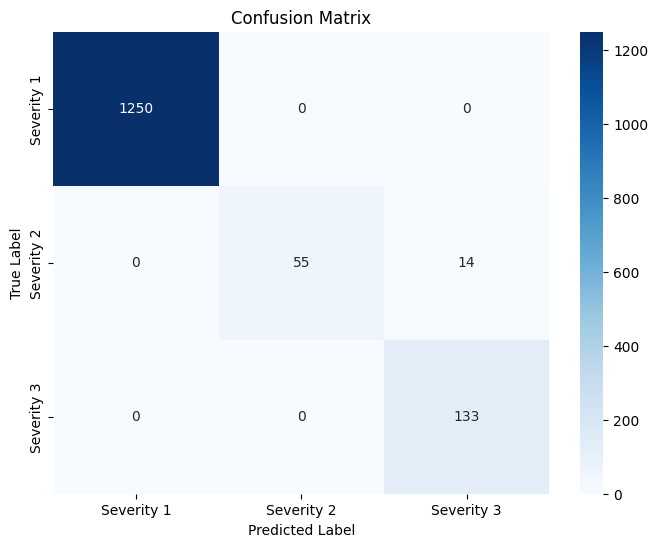

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Severity 1', 'Severity 2', 'Severity 3'],
            yticklabels=['Severity 1', 'Severity 2', 'Severity 3'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## K-Means on embedded data

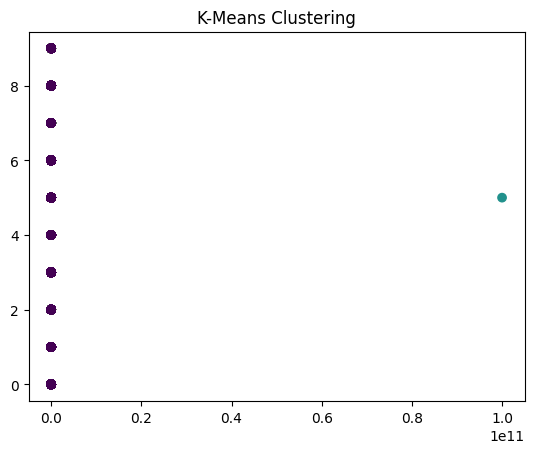

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(combined_data_encoded)

# Get the cluster labels
labels = kmeans.labels_

# Plot the data with cluster assignments
plt.scatter(combined_data_encoded.iloc[:, 0], combined_data_encoded.iloc[:, 1], c=labels)
plt.title('K-Means Clustering')
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [ ]:
y1 = "Severity"
X1 = combined_data.columns.drop(y)

X_data1 = combined_data[X1]
y_data1 = combined_data[y1]
#y_data1 = pd.get_dummies(y_data1, prefix="Severity",dtype = int)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_data1,
                                                    y_data1,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
# Identify categorical features
categorical_features_indices = [X_train1.columns.get_loc(col) for col in X_train1.select_dtypes(include=['object']).columns]

# Impute or remove NaN values in categorical features before creating Pool
for col in X_train1.select_dtypes(include=['object']).columns:
    # Option 1: Impute with a string like 'missing'
    X_train1[col] = X_train1[col].fillna('missing')
    X_test1[col] = X_test1[col].fillna('missing')  # Apply the same to X_test1
    # Option 2: Remove rows with NaN in categorical features
    # X_train1 = X_train1.dropna(subset=[col])
    # X_test1 = X_test1.dropna(subset=[col]) # Apply the same to X_test1

# Create a CatBoost Pool object with categorical features specified
train_pool = Pool(X_train1, y_train1, cat_features=categorical_features_indices)
test_pool = Pool(X_test1, y_test1, cat_features=categorical_features_indices)

# Initialize and train the CatBoostClassifier
model = CatBoostClassifier()
model.fit(train_pool)  # Use the Pool object for training

# Evaluate and predict
accuracy = model.score(X_test1, y_test1)
predictions = model.predict(X_tes1t)

CatBoostError: catboost/private/libs/target/target_converter.cpp:467: NaN values are not supported for target

In [ ]:
y_train_labels1 = y_train1.idxmax().astype(int)
y_test_labels1 = y_test1.idxmax().astype(int)

rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_classifier.fit(X_train1, y_train_labels1)
rf_predictions1 = rf_classifier.predict(X_test1)

rf_accuracy = accuracy_score(y_test_labels1, rf_predictions1)
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}\n")
print("Random Forest Classification Report:")
print(classification_report(y_test_labels1, rf_predictions1))

ValueError: could not convert string to float: 'Male'

In [ ]:
y_train_labels = y_train.idxmax(axis=1).astype(int)
y_test_labels = y_test.idxmax(axis=1).astype(int)

rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_classifier.fit(X_train, y_train_labels)
rf_predictions = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test_labels, rf_predictions)
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}\n")
print("Random Forest Classification Report:")
print(classification_report(y_test_labels, rf_predictions))

Random Forest Test Accuracy: 0.2700

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.33      0.39      0.36        36
           2       0.29      0.23      0.25        35
           3       0.17      0.17      0.17        29

    accuracy                           0.27       100
   macro avg       0.26      0.26      0.26       100
weighted avg       0.27      0.27      0.27       100



## Gradient Boosting

In [ ]:
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_classifier.fit(X_train, y_train_labels)
gb_predictions = gb_classifier.predict(X_test)

gb_accuracy = accuracy_score(y_test_labels, gb_predictions)
print(f"Gradient Boosting Test Accuracy: {gb_accuracy:.4f}\n")
print("Gradient Boosting Classification Report:")
print(classification_report(y_test_labels, gb_predictions))

Gradient Boosting Test Accuracy: 0.2500

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           1       0.29      0.39      0.33        36
           2       0.27      0.17      0.21        35
           3       0.17      0.17      0.17        29

    accuracy                           0.25       100
   macro avg       0.24      0.24      0.24       100
weighted avg       0.25      0.25      0.24       100



## Multi-logistic Regression

In [ ]:
logistic_classifier = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)
logistic_classifier.fit(X_train, y_train_labels)
logistic_predictions = logistic_classifier.predict(X_test)

logistic_accuracy = accuracy_score(y_test_labels, logistic_predictions)
print(f"Multinomial Logistic Regression Test Accuracy: {logistic_accuracy:.4f}\n")
print("Multinomial Logistic Regression Classification Report:")
print(classification_report(y_test_labels, logistic_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Multinomial Logistic Regression Test Accuracy: 0.2800

Multinomial Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.33      0.33      0.33        36
           2       0.32      0.20      0.25        35
           3       0.21      0.31      0.25        29

    accuracy                           0.28       100
   macro avg       0.29      0.28      0.28       100
weighted avg       0.29      0.28      0.28       100



## Support Vector Machine

In [ ]:
svm_classifier = SVC(
    kernel='linear',
    probability=True,
    random_state=42
)
svm_classifier.fit(X_train, y_train_labels)
svm_predictions = svm_classifier.predict(X_test)

svm_accuracy = accuracy_score(y_test_labels, svm_predictions)
print(f"SVM Test Accuracy: {svm_accuracy:.4f}\n")
print("SVM Classification Report:")
print(classification_report(y_test_labels, svm_predictions))

SVM Test Accuracy: 0.3100

SVM Classification Report:
              precision    recall  f1-score   support

           1       0.37      0.28      0.32        36
           2       0.37      0.29      0.32        35
           3       0.24      0.38      0.29        29

    accuracy                           0.31       100
   macro avg       0.33      0.31      0.31       100
weighted avg       0.33      0.31      0.31       100



## K-Nearest Neighbors

In [ ]:
knn_classifier = KNeighborsClassifier(
    n_neighbors=5,
    n_jobs=-1
)
knn_classifier.fit(X_train, y_train_labels)
knn_predictions = knn_classifier.predict(X_test)

knn_accuracy = accuracy_score(y_test_labels, knn_predictions)
print(f"KNN Test Accuracy: {knn_accuracy:.4f}\n")
print("KNN Classification Report:")
print(classification_report(y_test_labels, knn_predictions))

KNN Test Accuracy: 0.3300

KNN Classification Report:
              precision    recall  f1-score   support

           1       0.31      0.44      0.36        36
           2       0.35      0.23      0.28        35
           3       0.36      0.31      0.33        29

    accuracy                           0.33       100
   macro avg       0.34      0.33      0.32       100
weighted avg       0.34      0.33      0.32       100



## Decision Tree

In [ ]:
dt_classifier = DecisionTreeClassifier(
    max_depth=None,
    random_state=42
)
dt_classifier.fit(X_train, y_train_labels)
dt_predictions = dt_classifier.predict(X_test)

dt_accuracy = accuracy_score(y_test_labels, dt_predictions)
print(f"Decision Tree Test Accuracy: {dt_accuracy:.4f}\n")
print("Decision Tree Classification Report:")
print(classification_report(y_test_labels, dt_predictions))

Decision Tree Test Accuracy: 0.2800

Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.39      0.36      0.38        36
           2       0.25      0.23      0.24        35
           3       0.20      0.24      0.22        29

    accuracy                           0.28       100
   macro avg       0.28      0.28      0.28       100
weighted avg       0.29      0.28      0.28       100



## XGBoost Classifier

In [ ]:
xgb_classifier = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
y_train_labels_1 = y_train_labels - 1
y_test_labels_1 = y_test_labels - 1
xgb_classifier.fit(X_train, y_train_labels_1)
xgb_predictions = xgb_classifier.predict(X_test)

xgb_accuracy = accuracy_score(y_test_labels_1, xgb_predictions)
print(f"XGBoost Test Accuracy: {xgb_accuracy:.4f}\n")
print("XGBoost Classification Report:")
print(classification_report(y_test_labels, xgb_predictions))

XGBoost Test Accuracy: 0.3200

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.35      0.17      0.23        36
           2       0.45      0.43      0.44        35
           3       0.00      0.00      0.00        29

    accuracy                           0.21       100
   macro avg       0.20      0.15      0.17       100
weighted avg       0.29      0.21      0.24       100



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:38:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels w

## Multi-Layer Perceptron

In [ ]:
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)
mlp_classifier.fit(X_train, y_train_labels)
mlp_predictions = mlp_classifier.predict(X_test)

mlp_accuracy = accuracy_score(y_test_labels, mlp_predictions)
print(f"MLP Test Accuracy: {mlp_accuracy:.4f}\n")
print("MLP Classification Report:")
print(classification_report(y_test_labels, mlp_predictions))

MLP Test Accuracy: 0.3500

MLP Classification Report:
              precision    recall  f1-score   support

           1       0.41      0.44      0.43        36
           2       0.36      0.26      0.30        35
           3       0.28      0.34      0.31        29

    accuracy                           0.35       100
   macro avg       0.35      0.35      0.34       100
weighted avg       0.35      0.35      0.35       100



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Naive Bayes Classifier

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train_labels)
nb_predictions = nb_classifier.predict(X_test)

nb_accuracy = accuracy_score(y_test_labels, nb_predictions)
print(f"Naive Bayes Test Accuracy: {nb_accuracy:.4f}\n")
print("Naive Bayes Classification Report:")
print(classification_report(y_test_labels, nb_predictions))

Naive Bayes Test Accuracy: 0.3300

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           1       0.46      0.36      0.41        36
           2       0.34      0.34      0.34        35
           3       0.22      0.28      0.24        29

    accuracy                           0.33       100
   macro avg       0.34      0.33      0.33       100
weighted avg       0.35      0.33      0.34       100

